In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for analytical_a (obs_a)
def analytical_a(t, a0, b0, k1=0.8, k2=0.6):
    return k2 * (a0 + b0) / (k1 + k2) + (
        k2 * (a0 + b0) / (k1 + k2)
    ) * np.exp((-k1 - k2) * t)
    
# def analytical_a(t, a0, b0, k1=0.8, k2=0.6):
#     return k2 * (a0 + b0) / (k1 + k2) + (
#         np.abs(k1*a0 - k2*b0) / (k1 + k2)
#     ) * np.exp(-(k1 + k2)*t)

k1_true = 0.5
k2_true = 0.05

def analytical_a(t, a0, b0, k1=0.5, k2=0.05):
    alpha = k1 + k2
    beta = k2 * (a0 + b0)
    
    return beta / alpha + np.abs(alpha*a0 - beta)/alpha * np.exp(-alpha*t)


# conditions = [(1.25, 0.25), (1.5, 0.3), (1.75, 0.35)]  # Example conditions
conditions = [(2.0, 0.0), (1.5, 0.5), (1.0, 1.0), (0.5, 1.5)]
num_conditions = len(conditions)
times = np.linspace(0, 3, 10)
sigma = 0.00

# Initialize an empty dataframe
measurement_df = pd.DataFrame(columns=['observableId', 'simulationConditionId', 'time', 'measurement'])

conditions_data = []

for i, (a0, b0) in enumerate(conditions, start=1):
    measurements_a = [analytical_a(t, a0, b0, k1_true, k2_true) for t in times] + sigma * np.random.randn(len(times))
    measurements_b = a0 + b0 - measurements_a

    # Create dataframes for obs_a and obs_b
    df_a = pd.DataFrame({
        'observableId': ['obs_a'] * len(times),
        'simulationConditionId': [f'c_{i}'] * len(times),
        'time': times,
        'measurement': measurements_a
    })

    df_b = pd.DataFrame({
        'observableId': ['obs_b'] * len(times),
        'simulationConditionId': [f'c_{i}'] * len(times),
        'time': times,
        'measurement': measurements_b
    })

    # Append to the main dataframe
    measurement_df = pd.concat([measurement_df, df_a, df_b], ignore_index=True)
    # measurement_df = pd.concat([measurement_df, df_a], ignore_index=True)
    
    # Add to conditions data
    # conditions_data.append({'conditionId': f'c_{i}', 'a0': a0, 'b0': b0})
    conditions_data.append({
                            'conditionId': f'c_{i}', 
                            'conditionName': f'c_{i}',
                            'A': a0,
                            'B': b0})

# Convert conditions data to dataframe
conditions_df = pd.DataFrame(conditions_data)

# Save the dataframe to a file
# measurement_df.to_csv('doc/example/TEST_conversion_reaction/multiple_conditions/measurements.tsv', sep='\t', index=False)
measurement_df.to_csv('/SBML/PyPESTO/TEST_conversion/TEST_conversion_reaction/measurements.tsv', sep='\t', index=False)

conditions_df.to_csv('/SBML/PyPESTO/TEST_conversion/TEST_conversion_reaction/multiple_conditions/conditions.tsv', sep='\t', index=False)

In [41]:
import amici

# sbml_file = f"./{model_name}/{model_name}.xml"
model_name = 'FRP'
model_output_dir = 'tmp/' + model_name
sbml_file = '/SBML/PyPESTO/FRP/sbml_model.xml'
# Create an SbmlImporter instance for our SBML model
sbml_importer = amici.SbmlImporter(sbml_file)

In [42]:
sbml_importer.sbml2amici(model_name, model_output_dir, verbose=False)
# solver = model.getSolver()

In [43]:
model_module = amici.import_model_module(model_name, model_output_dir)

In [55]:
model = model_module.getModel()

print("Model parameters: ", list(model.getParameterIds()))
print("Model observables:", list(model.getObservableIds()))
print("Model states:     ", list(model.getStateIds()))

Model parameters:  ['kd', 'f', 'kpAA', 'kpAB', 'kpBA', 'kpBB']
Model observables: ['yI', 'yR', 'yA', 'yB', 'yRA', 'yRB', 'yPAA', 'yPAB', 'yPBA', 'yPBB', 'yfPAA', 'yfPAB', 'yfPBA', 'yfPBB', 'yPA', 'yPB', 'yc']
Model states:      ['I', 'R', 'A', 'B', 'RA', 'RB', 'PAA', 'PAB', 'PBA', 'PBB']


In [64]:
model.setParameterByName('kd', 1e10)
model.setParameterByName('kpAA', 2.0)
model.setParameterByName('kpAB', 0.5)
model.setParameterByName('kpBA', 10.0)
model.setParameterByName('kpBB', 0.1)
model.getParameters()

(10000000000.0, 0.5, 2.0, 0.5, 10.0, 0.1)

In [65]:
model.setInitialStates([5e-3, 0, 2.1, 0.9, 0, 0, 0, 0, 0, 0])

In [71]:
import numpy as np
timepoints = np.linspace(0, 100, 10)
model.setTimepoints(timepoints)

solver = model.getSolver()
solver.setAbsoluteTolerance(1e-10)
# solver.step

In [78]:
for i in range(1000):
    rdata = amici.runAmiciSimulation(model, solver)

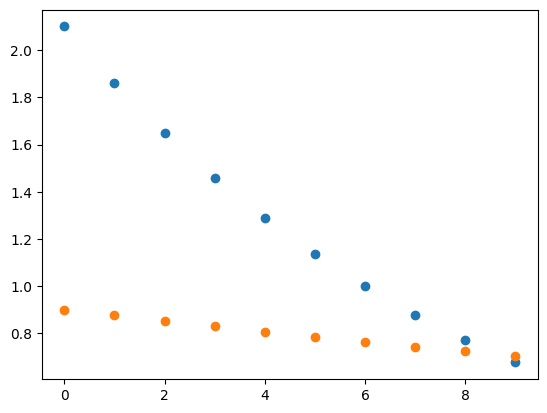

In [81]:
import matplotlib.pyplot as plt

plt.plot(rdata.by_id('A'), 'o')
plt.plot(rdata.by_id('B'), 'o')

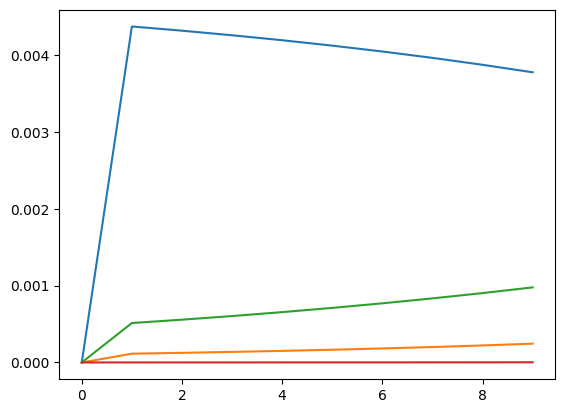

In [82]:
plt.plot(rdata.by_id('PAA'))
plt.plot(rdata.by_id('PAB'))
plt.plot(rdata.by_id('PBA'))
plt.plot(rdata.by_id('PBB'))

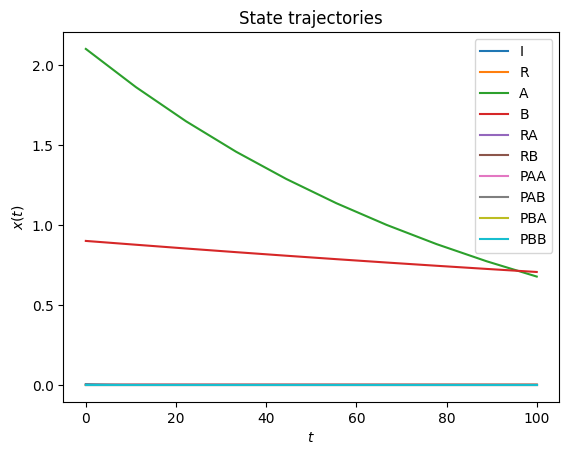

In [84]:
import amici.plotting
amici.plotting.plot_state_trajectories(rdata, model=None)

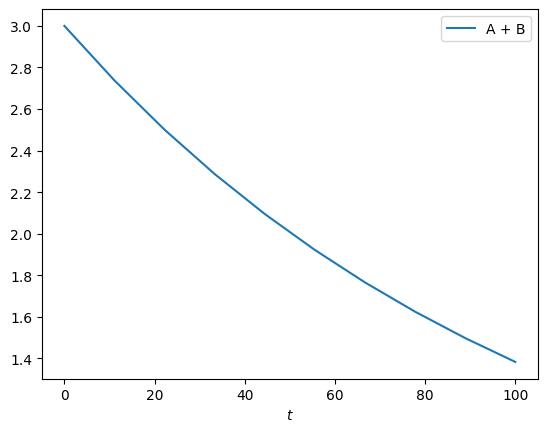

In [85]:
amici.plotting.plot_expressions(
    "A + B", rdata=rdata
)

In [79]:
for key, value in rdata.items():
    print("%12s: " % key, value)

          ts:  [  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
           x:  [[ 5.00000000e-003  0.00000000e+000  2.10000000e+000  9.00000000e-001
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-2.92274648e-276  6.45948877e-012  1.86127312e+000  8.76172140e-001
   4.67717133e-011  3.31062750e-014  4.37184282e-003  1.14390425e-004
   5.13228706e-004  5.37997131e-007]
 [-1.47487004e-298  2.05386260e-013  1.64781234e+000  8.52625025e-001
   1.16579132e-012 -3.45282001e-015  4.31708087e-003  1.25384593e-004
   5.56886424e-004  6.48113234e-007]
 [ 2.72420926e-299 -5.24711672e-012  1.45731771e+000  8.29753835e-001
  -2.60918787e-011  7.35547560e-015  4.25755859e-003  1.37542653e-004
   6.04116577e-004  7.82214809e-007]
 [-3.64770151e-304  1.84282162e-011  1.28736263e+000  8.07542621e-001
   6.89345152e-011  9.46490817e-013  4.19287076e-003  1.510

In [80]:
rdata.by_id('A')

array([2.1       , 1.86127312, 1.64781234, 1.45731771, 1.28736263,
       1.13577632, 1.00061694, 0.88014757, 0.77281459, 0.67722872])